In [12]:
#extract data from localizer blur epi data
import os
import numpy as np
import subprocess
def listdir(path,hemi):
    num = []
    for file in os.listdir(path):
        temp = file.split(".")
        if temp[0] == "newNodes_"+hemi+"_SurfCoord":
            num.append(temp[1])
    return num

run = range(1,3)
hemiList = ["lh","rh"]
subjname = "bg_data"
surfName = "bg"
filePath = "/home/hh/study/python/code/ml/nipype_tutorial/bingfreesurfer/"+subjname+"/SUMA"

for hemi in hemiList:
    num = listdir(filePath,hemi)
    for r in run:
        for i in range(len(num)):
            
            command1 = "cd "+filePath+";\
            ConvertDset -input pb04."+surfName+".surf."+hemi+".r0"+str(r)+".blur.niml.dset \
            -node_select_1D newNodes_"+hemi+"_SurfCoord."+num[i]+".1D \
            -o_1D_stdout > "+hemi+"_roi"+num[i]+"run"+str(r)+".Nodesvals.txt"
            
            subprocess.call(command1, shell=True)

In [ ]:
#画出percent single change
import matplotlib.pyplot as plt
import os
import numpy as np

#读取所有run的bold信号的大小
#把所有node的值相加，求平均,即求这个roi的平均的时间序列
def getBoldData(boldInfileDir,roiName):
    temp = []
    x =[]
    boldFileName = roiName
    boldFinalDir = os.path.join(boldInfileDir,boldFileName)
    with open(boldFinalDir) as f:
        for line ,i in enumerate(f.readlines()):
            if i[0] != "#":
                temp.append(np.array(map(float,i.split(" ")[1:])))
    aveRoiData = np.zeros((1,len(temp[0])))
    for i in range(0,len(temp)-1):
#         print "temp",temp[i],boldFinalDir         
        temp[i].shape = 1,168
        aveRoiData = aveRoiData+temp[i]
    aveRoiData = aveRoiData/(len(temp)-1)
    aveRoiData = aveRoiData[0]
    return aveRoiData

def showpsc(mat,roiName):
    fig, ax = plt.subplots()
    fig.set_size_inches(9.5, 5.5)
#         fig.savefig('test2png.png', dpi=100)
    plt.figure(figsize=(20,10))
    plt.xlabel("time(s)")
    plt.ylabel("psc(%)")
    plt.title(roiName[i])
    
    for Scoretype in [0,1]:#把数据分成两份，一份是face的，一份是house的
        trNumber = 12
        countBlockNum = 5
        uniaverage = []
        allPsc = np.zeros([trNumber,1],int)
        finalPsc = []
        stimuluName = " "
        for r in range(0,1):#一共有2个run,看每个run看face/house的起始时间点 
            if Scoretype == 0:
                stimuluName = "face"
                tem = np.array([16,80,144,208,272])/2 #读取第几个tr的时间点
            if Scoretype == 1:
                stimuluName = "house"
                tem = np.array([48,112,176,240,304])/2
            for j in tem:
                baseTime = mat[j+1:j+3] #读取第r个run的face的bold信号的数据
                videoTime = mat[j+1:j+trNumber+1]
                baseline = np.sum(baseTime,axis=-1)/2
                psc = (videoTime - baseline)/baseline*100 #求得视频播放期间每个时间点的persent single changde
                allPsc = np.array([float(m+n) for m,n in zip(allPsc,psc)])
        allPsc = allPsc/countBlockNum
        finalPsc.append(list(allPsc))
        finalPsc = np.array(finalPsc)
        x = list(range(16,16+trNumber*2,2))
        y1 = finalPsc[0]
        ax.plot(x, y1, label=roiName+stimuluName)
        plt.legend() # 显示图例
    return finalPsc

#求这段时间的脸和房子的，分别的平均的PSC的信号
def get_runSignalChange(mat):
    avesignalchange = []
    for Scoretype in [0,1]:#把数据分成两份，一份是face的，一份是house的
        trNumber = 12
        countBlockNum = 5
        uniaverage = []
        allPsc = np.zeros([trNumber,1],int)
        finalPsc = []
        stimuluName = " "
        for r in range(0,1):#一个run,看这个run看face/house的起始时间点 
            if Scoretype == 0:
                stimuluName = "face"
                tem = np.array([16,80,144,208,272])/2 #读取第几个tr的时间点
            if Scoretype == 1:
                stimuluName = "house"
                tem = np.array([48,112,176,240,304])/2
            for j in tem:
                baseTime = mat[j+1:j+3] #读取第r个run的face的bold信号的数据
                videoTime = mat[j+1:j+trNumber+1]
                baseline = np.sum(baseTime,axis=-1)/2
                psc = (videoTime - baseline)/baseline*100 #求得视频播放期间每个时间点的persent single changde
                allPsc = np.array([float(m+n) for m,n in zip(allPsc,psc)])
        allPsc = allPsc/countBlockNum
        finalPsc.append(list(allPsc))
        finalPsc = np.array(finalPsc)
        avesignalchange.append(np.sum(finalPsc)/trNumber)
    return avesignalchange


# def listdir(path,hemi):
#     num = []
#     for file in os.listdir(path):
#         temp = file.split(".")
#         if temp[0] == str(hemi)+"_SurfCoord":
#             num.append(temp[1])
# #     num = np.sort(num)
#     return num

def listdir(filePath,nodeIndices,hemi):
    path = os.path.join(filePath,nodeIndices)
#     print "path",path
    num = []
    with open(path) as f:
        for line ,i in enumerate(f.readlines()):
            num.append(int(float(i[3:])))
    return num

def drawSignalChange(fileName,roiName,hemi,subjectName):
    distanSignalChange_face = []
    distanSignalChange_house = []
#     print roiName
    
    for i in range(len(roiName)):
        ymin = 0.333
        ymax = 0.345
        yinter = 0.005
        
#         fig, ax = plt.subplots()
#         fig.set_size_inches(9.5, 5.5)
# #         fig.savefig('test2png.png', dpi=100)
#         plt.figure(figsize=(20,10))
#         plt.xlabel("time(s)")
#         plt.ylabel("psc(%)")
#         plt.title(roiName[i])
    
        aveRoiData = np.zeros(168)
        runSignalChange = np.zeros(1)
        for r in ["1","2"]:
            nodesName = hemi+"_roi"+str(roiName[i])+"run"+r+".Nodesvals.txt"
            aveRoiData =aveRoiData + np.array(getBoldData(fileName,nodesName))
            runSignalChange = runSignalChange + np.array(get_runSignalChange(aveRoiData))
            
        runSignalChange = runSignalChange/2
        distanSignalChange_face.append(runSignalChange[0])
        distanSignalChange_house.append(runSignalChange[1])

    #     print "distanSignalChange_house",distanSignalChange_house

        aveRoiData = aveRoiData/2
#         finalPsc = showpsc(aveRoiData, "allrun_node_"+str(roiName[i])+"_")
#         plt.show()


    name_list = roiName

    fig, ax = plt.subplots()
    fig.set_size_inches(15.5, 10.5)
    plt.xlabel("cortical distance")
    plt.ylabel("signal change(%)")
    plt.title(str(subjectName)+str(hemi)+" signal change")

    x =list(range(0,len(distanSignalChange_face),1))
    total_width, n = 0.8, 2
    width = total_width / n
    plt.bar(x, distanSignalChange_face, width=width, label='face',fc = 'y')
    for i in range(len(x)):
        x[i] = x[i] + width
#     tick_label = name_list,
    plt.bar(x, distanSignalChange_house, width=width, label='house',tick_label = name_list,fc = 'r')
    plt.legend() # 显示图例
    plt.show()



    fig, ax = plt.subplots()
    fig.set_size_inches(15.5, 10.5)
    plt.title(str(subjectName)+str(hemi)+" signal change")
    x =list(range(0,len(distanSignalChange_face),1))

    plt.xlabel("distance")
    plt.ylabel("signal change(%)")
    plt.xlabel("cortical distance")
    plt.ylabel("signal change(%)")
    
#     plt.xticks(np.linspace(-len(x)/2,len(x)/2,len(x)-1)

    plt.plot(x, distanSignalChange_face, label="face")
    plt.plot(x, distanSignalChange_house, label="house")
    plt.legend()
    plt.show()

subjname = ["ab_data","bg_data"]
for s in range(len(subjname)):
    hemi = ["lh"]
    # hemi = ["lh"]
    # subjname = "bg_data"
    # surfName = "bg"
    filePath = "/home/hh/study/python/code/ml/nipype_tutorial/bingfreesurfer/"+subjname[s]+"/SUMA"
    for i in range(len(hemi)):
        nodeIndices = "nodelocations_"+hemi[i]+".1D"
        roiName = listdir(filePath,nodeIndices,str(hemi[i]))
        print roiName
        drawSignalChange(filePath,roiName,str(hemi[i]),subjname[s])

In [ ]:
#画出percent single change
import matplotlib.pyplot as plt
import os
import numpy as np

#读取所有run的bold信号的大小
#把所有node的值相加，求平均,即求这个roi的平均的时间序列
def getBoldData(boldInfileDir,roiName):
    temp = []
    x =[]
    boldFileName = roiName
    boldFinalDir = os.path.join(boldInfileDir,boldFileName)
    with open(boldFinalDir) as f:
        for line ,i in enumerate(f.readlines()):
            if i[0] != "#":
                temp.append(np.array(map(float,i.split(" ")[1:])))
    aveRoiData = np.zeros((1,len(temp[0])))
    for i in range(0,len(temp)-1):
#         print "temp",temp[i],boldFinalDir         
        temp[i].shape = 1,168
        aveRoiData = aveRoiData+temp[i]
    aveRoiData = aveRoiData/(len(temp)-1)
    aveRoiData = aveRoiData[0]
    return aveRoiData

def showpsc(mat,roiName):

    for Scoretype in [0,1]:#把数据分成两份，一份是face的，一份是house的
        trNumber = 12
        countBlockNum = 5
        uniaverage = []
        allPsc = np.zeros([trNumber,1],int)
        finalPsc = []
        stimuluName = " "
        if Scoretype == 0:
            stimuluName = "face"
            tem = np.array([16,80,144,208,272])/2 #读取第几个tr的时间点
        if Scoretype == 1:
            stimuluName = "house"
            tem = np.array([48,112,176,240,304])/2
        for j in tem:
            baseTime = mat[j-2:j] #读取第r个run的face的bold信号的数据
            videoTime = mat[j+1:j+trNumber+1]
            baseline = np.sum(baseTime,axis=-1)/2
            psc = (videoTime - baseline)/baseline*100 #求得face house时间点的persent single changde
            allPsc = np.array([float(m+n) for m,n in zip(allPsc,psc)])#把各个face阶段的psc的相加
        allPsc = allPsc/len(tem)#把各个face阶段的psc的相加，求平均
        
        finalPsc.append(list(allPsc))
        finalPsc = np.array(finalPsc)
        
        x = list(range(1,1+trNumber,1))
        y1 = allPsc
        plt.plot(x, y1, label=roiName+stimuluName)
        
    plt.legend() # 显示图例
    plt.show()
    return finalPsc


def listdir(filePath,nodeIndices,hemi):
    path = os.path.join(filePath,nodeIndices)
#     print "path",path
    num = []
    with open(path) as f:
        for line ,i in enumerate(f.readlines()):
            num.append(int(float(i[3:])))
    return num

def drawSignalChange(fileName,roiName,hemi,subjectName):
#     len(roiName)
    for i in range(len(roiName)):
        aveRoiData = np.zeros(168)
        runSignalChange = np.zeros(1)
        for r in ["1","2"]:
            nodesName = hemi+"_roi"+str(roiName[i])+"run"+r+".Nodesvals.txt"
            aveRoiData =aveRoiData + np.array(getBoldData(fileName,nodesName))
            finalPsc = showpsc(np.array(getBoldData(fileName,nodesName)), "run"+r+"_"+str(roiName[i])+"_")
                


subjname = ["ab_data"]
for s in range(len(subjname)):
    hemi = ["lh"]
    # hemi = ["lh"]
    # subjname = "bg_data"
    # surfName = "bg"
    filePath = "/home/hh/study/python/code/ml/nipype_tutorial/bingfreesurfer/"+subjname[s]+"/SUMA"
    for i in range(len(hemi)):
        nodeIndices = "nodelocations_"+hemi[i]+".1D"
        roiName = listdir(filePath,nodeIndices,str(hemi[i]))
        drawSignalChange(filePath,roiName,str(hemi[i]),subjname[s])

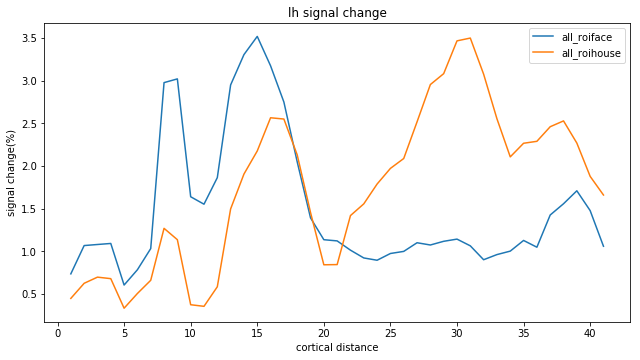

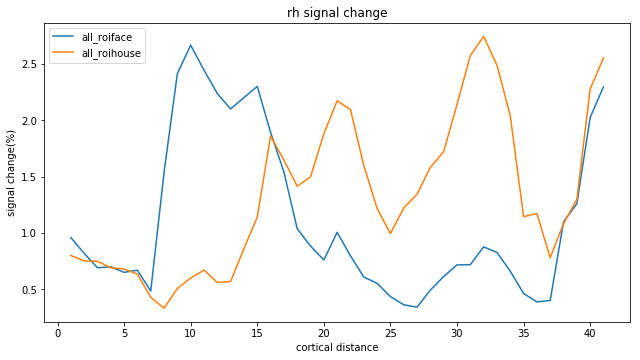

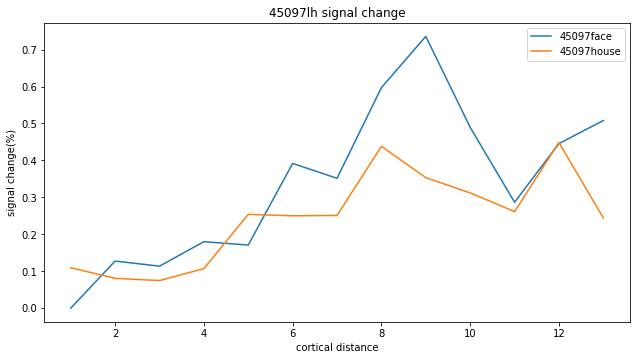

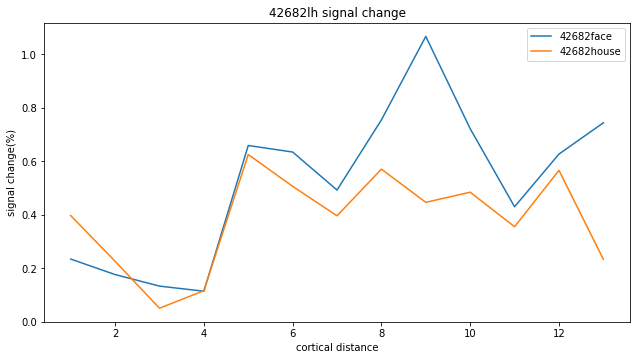

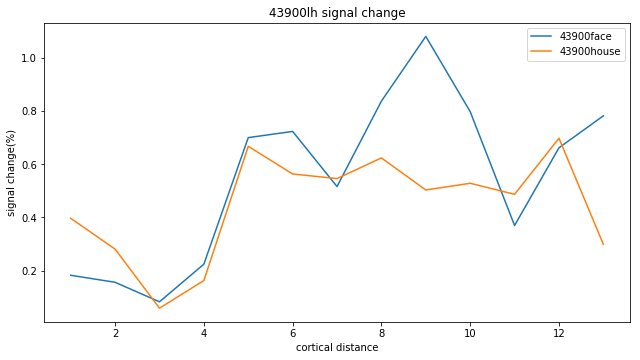

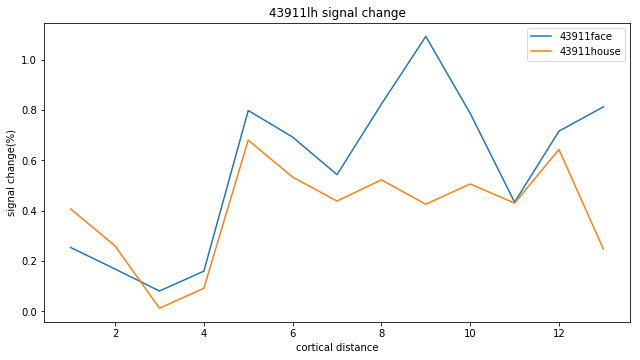

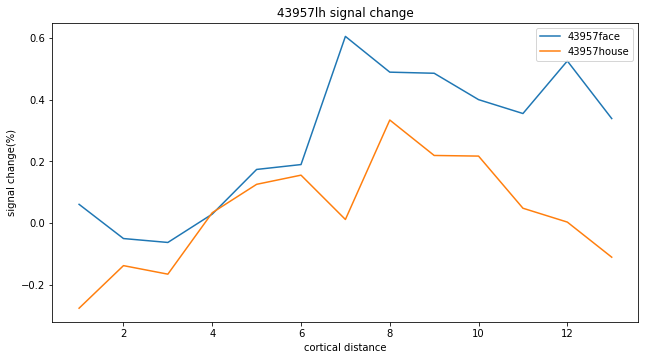

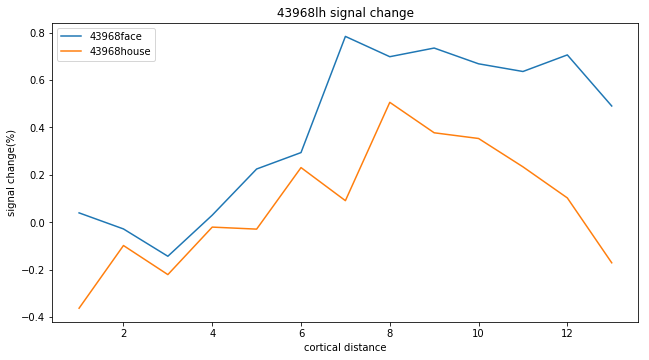

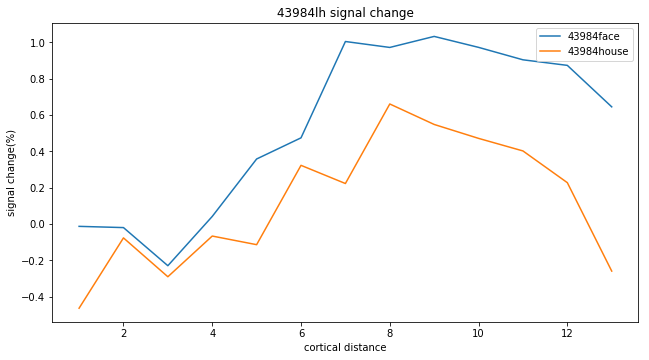

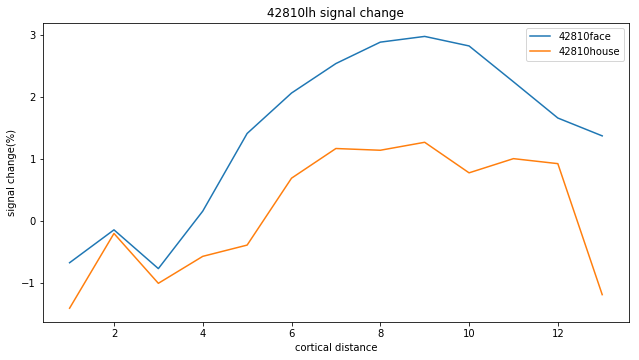

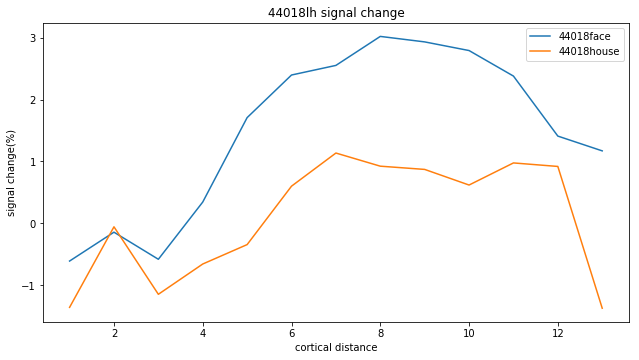

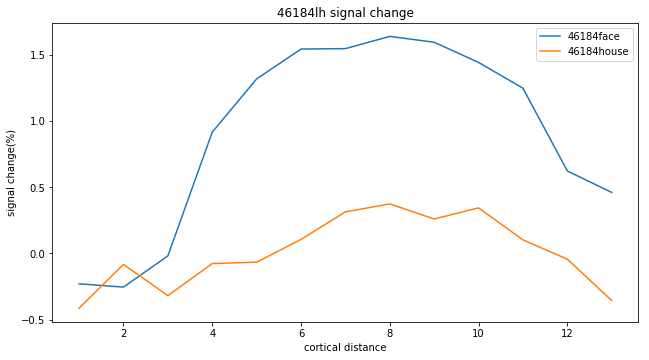

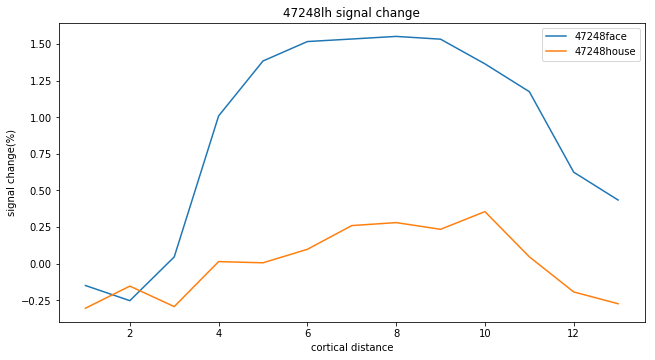

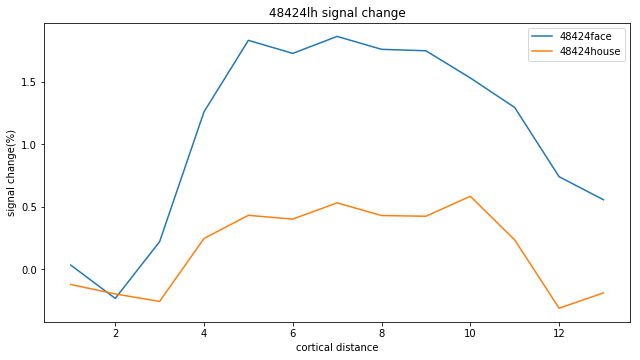

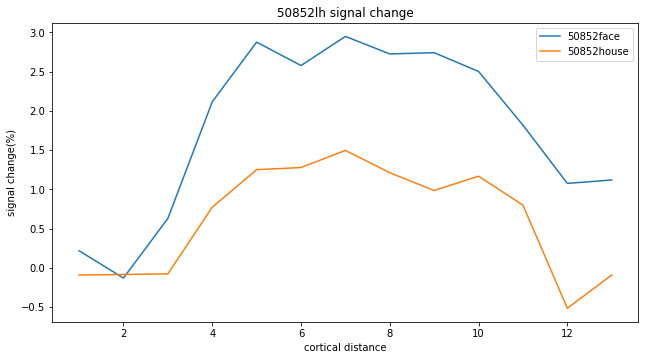

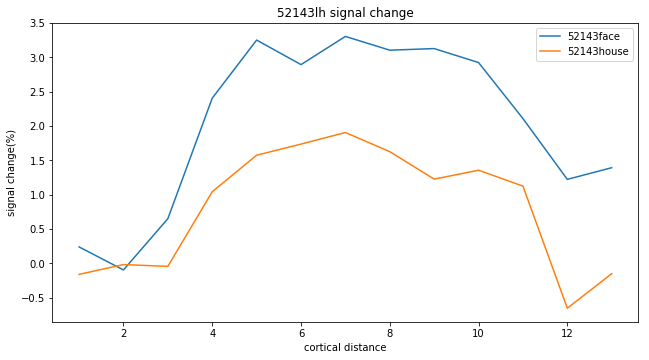

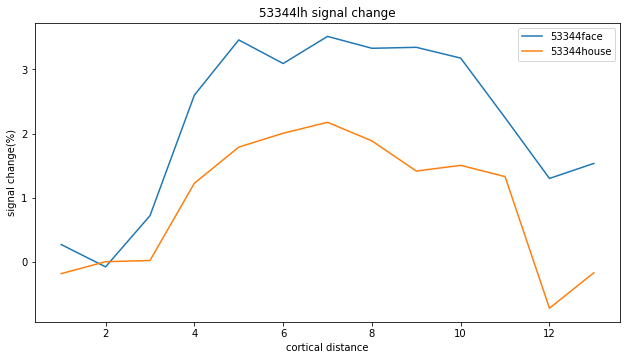

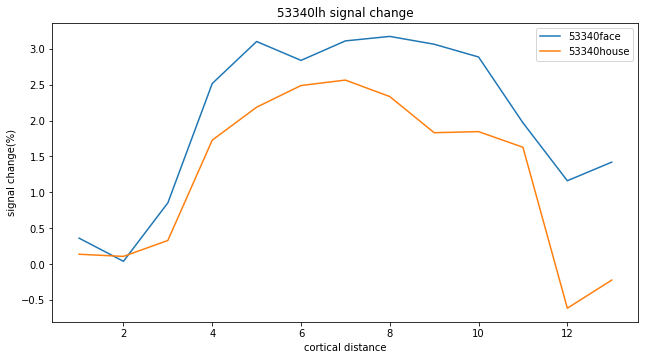

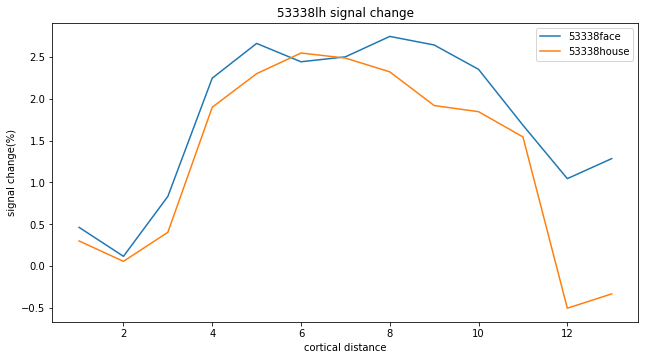

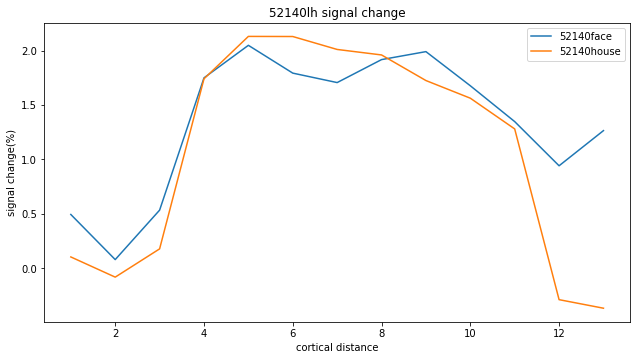

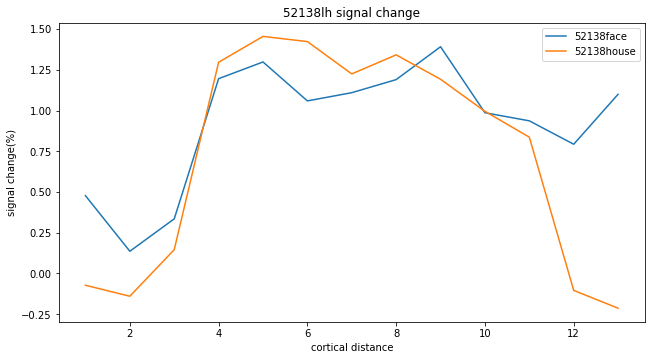

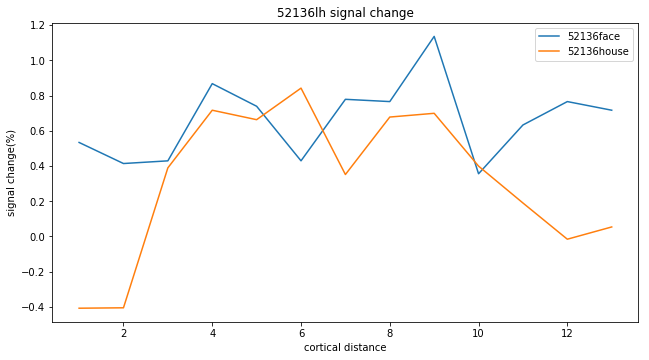

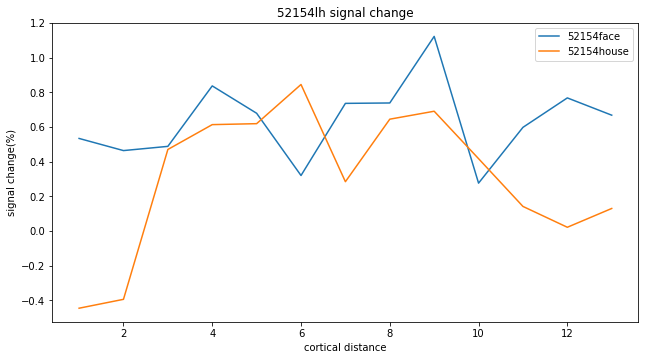

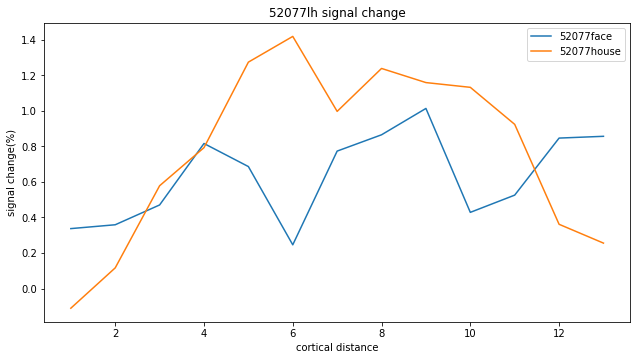

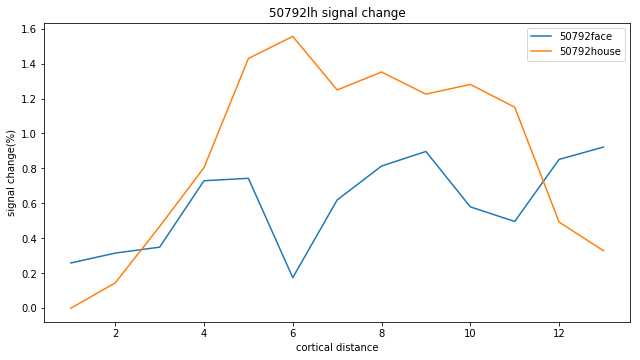

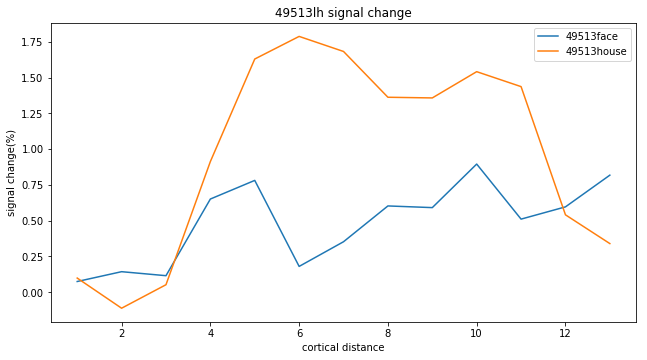

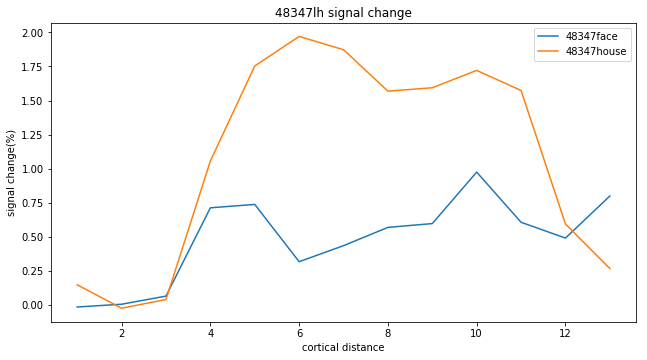

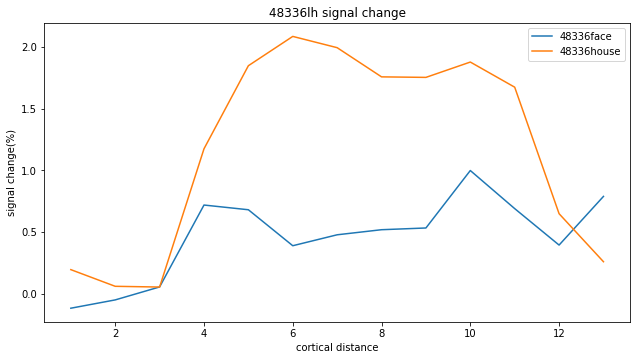

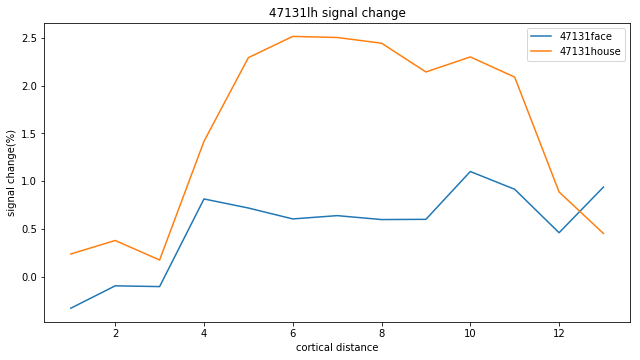

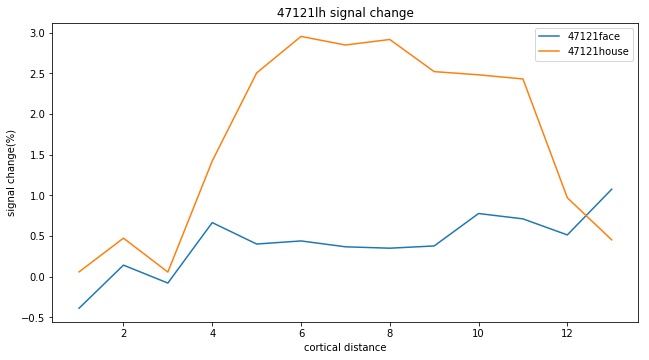

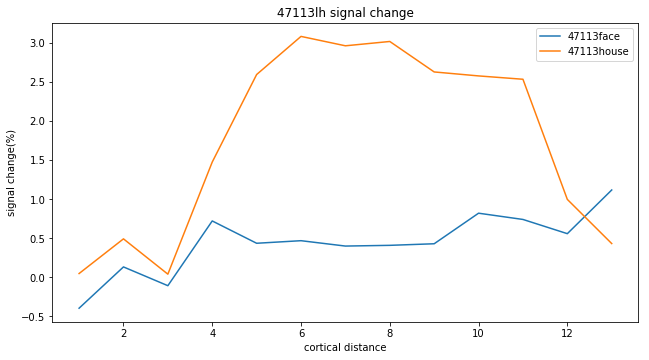

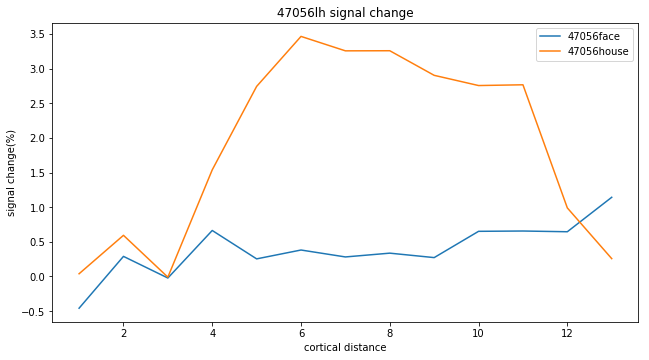

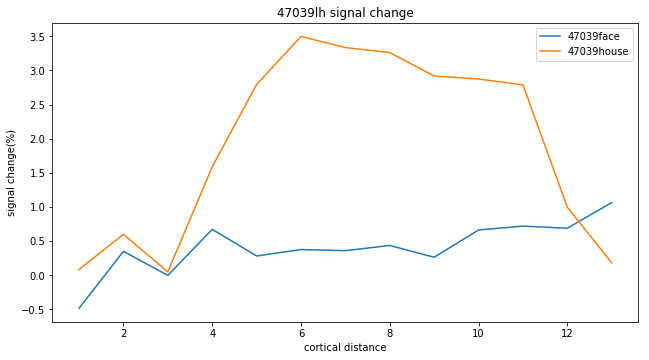

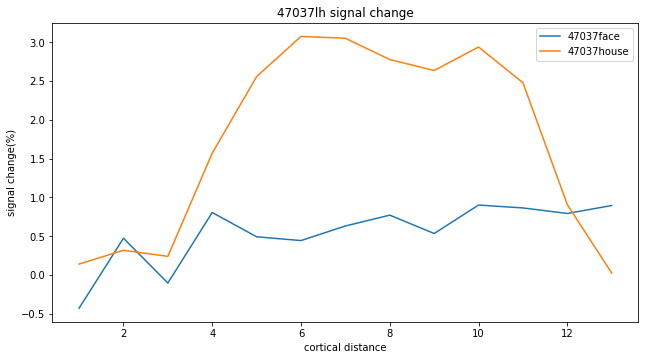

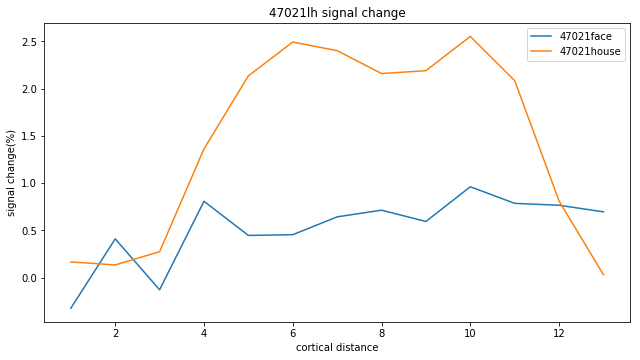

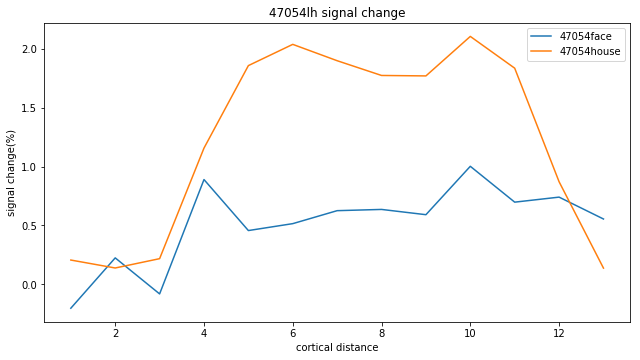

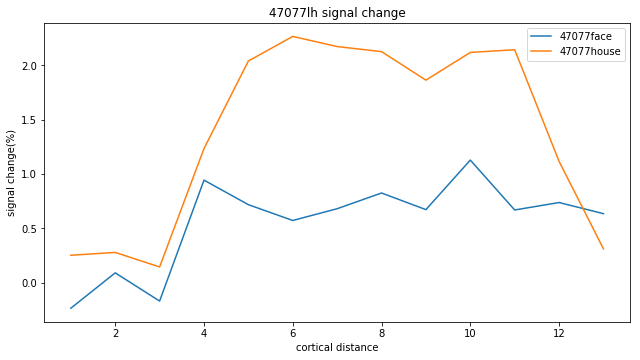

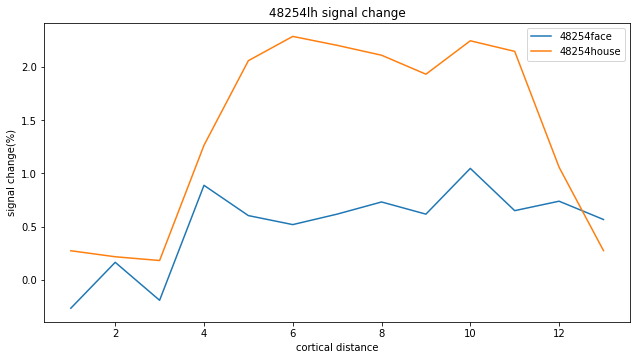

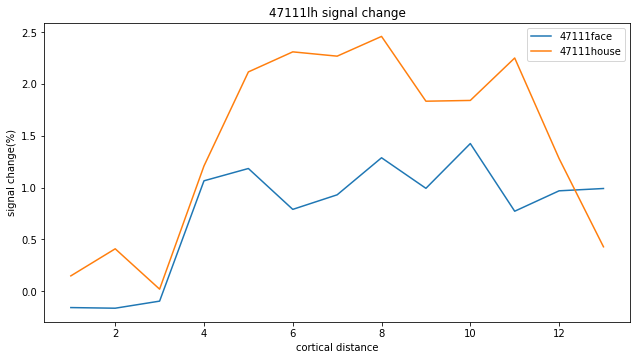

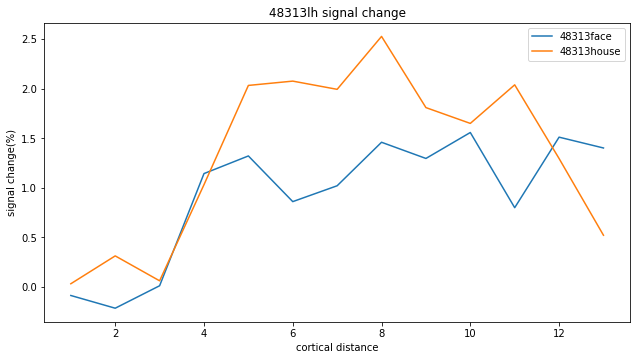

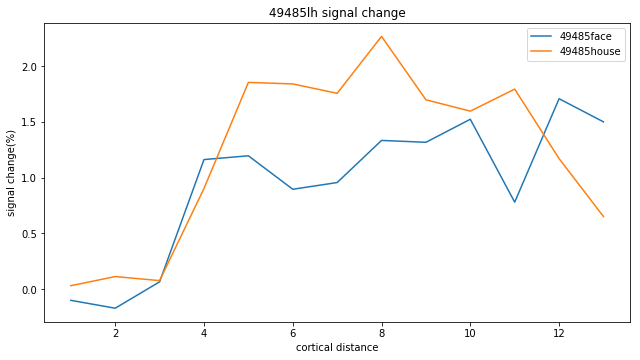

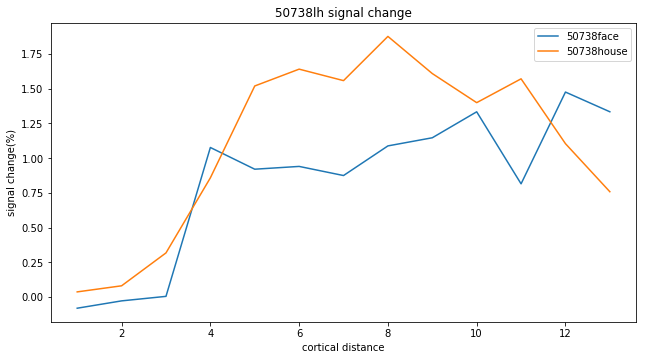

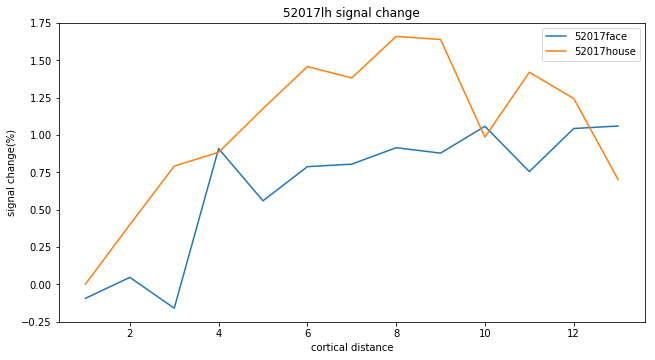

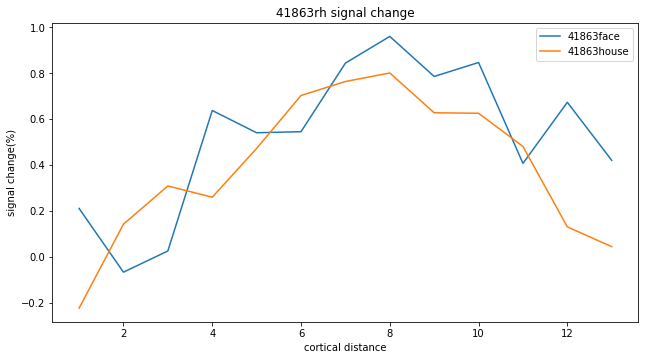

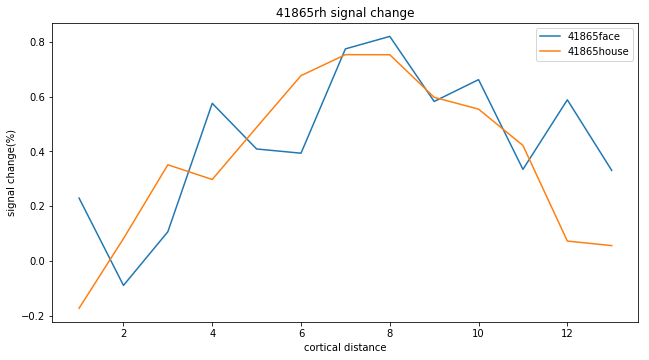

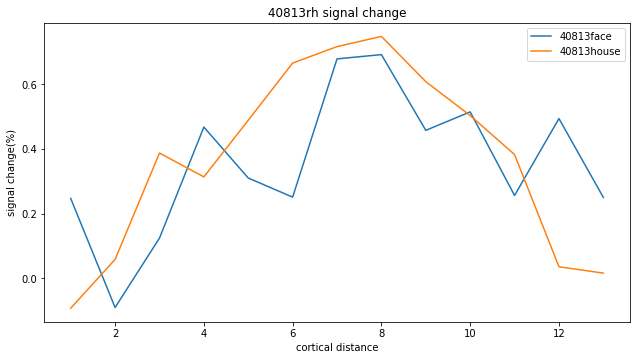

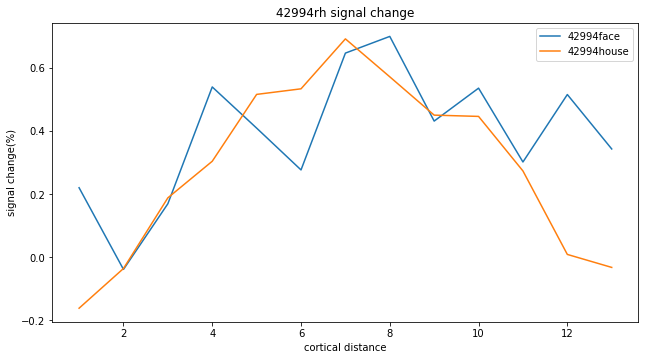

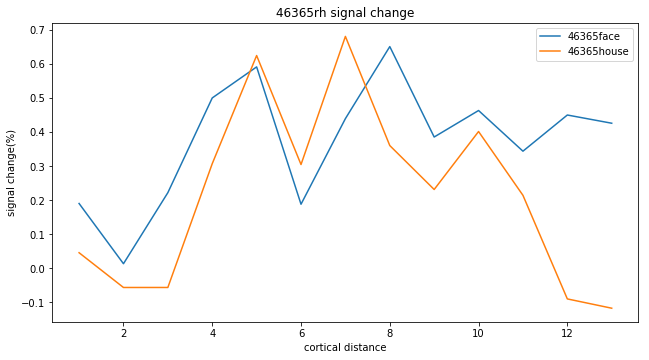

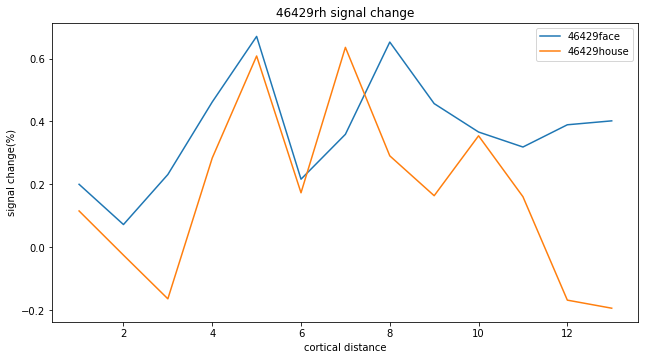

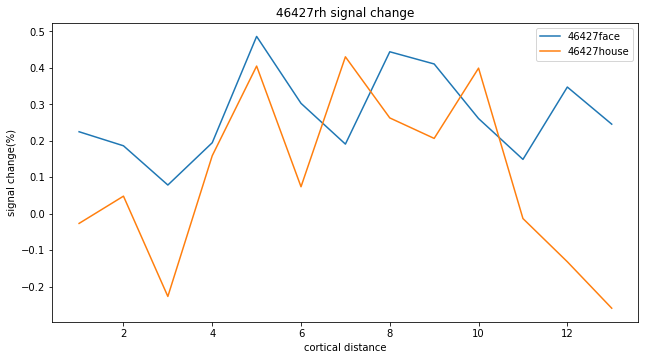

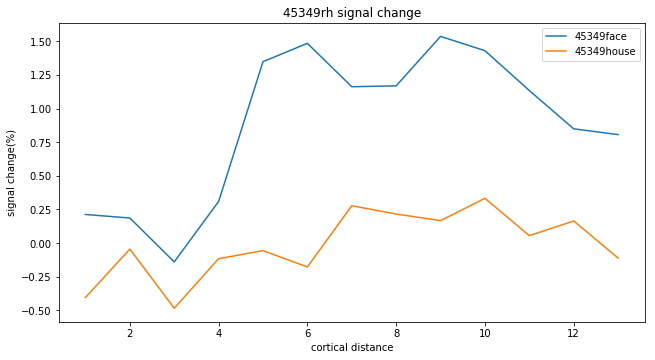

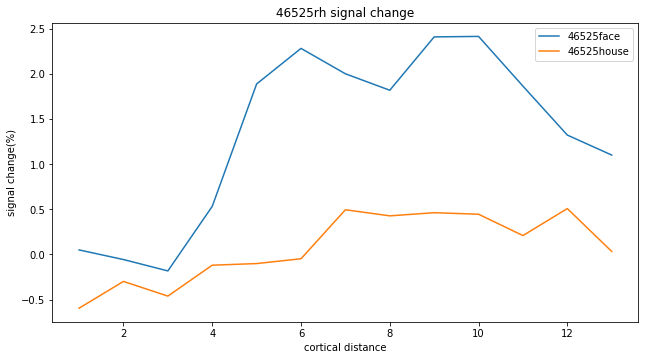

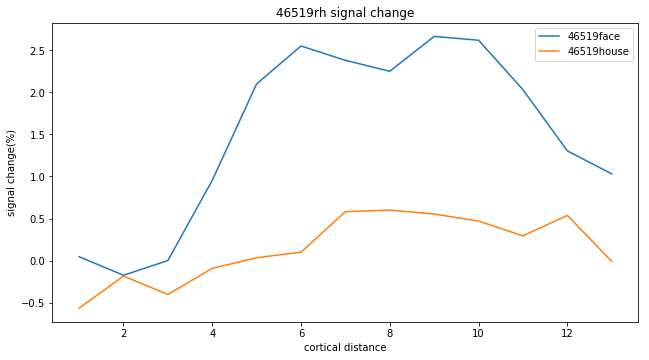

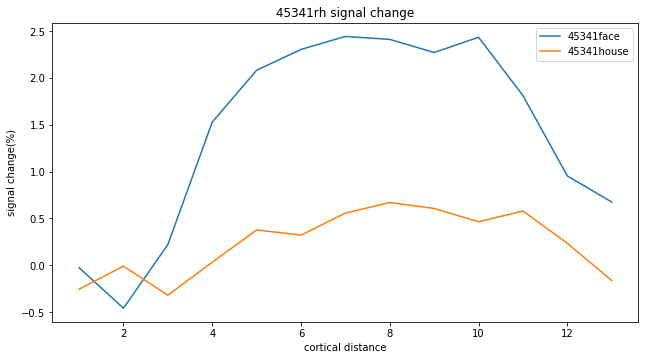

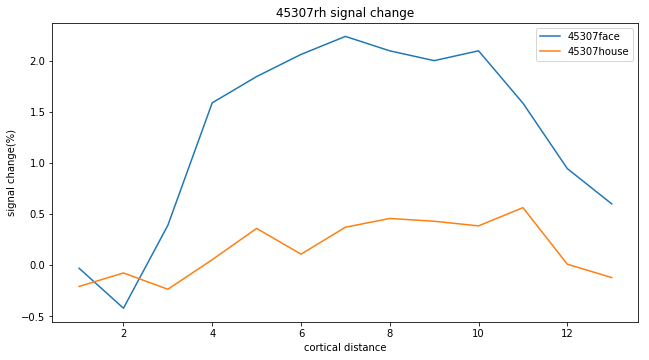

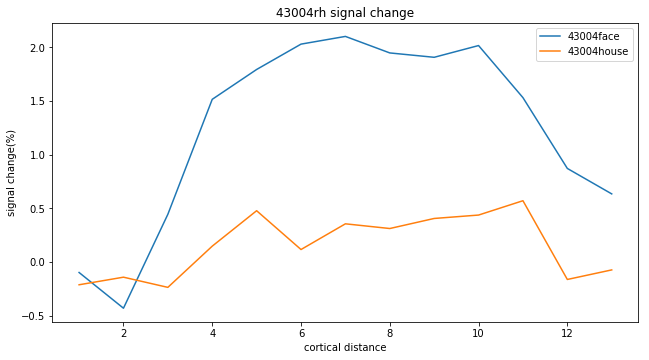

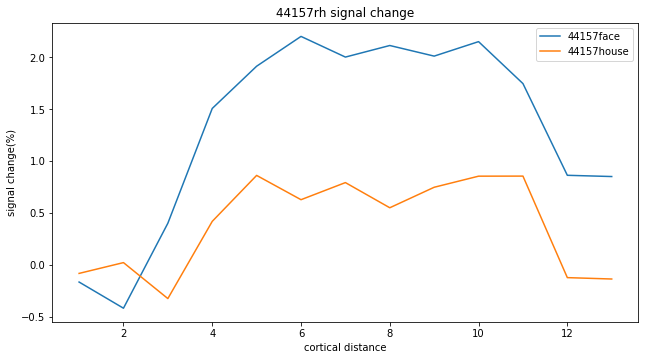

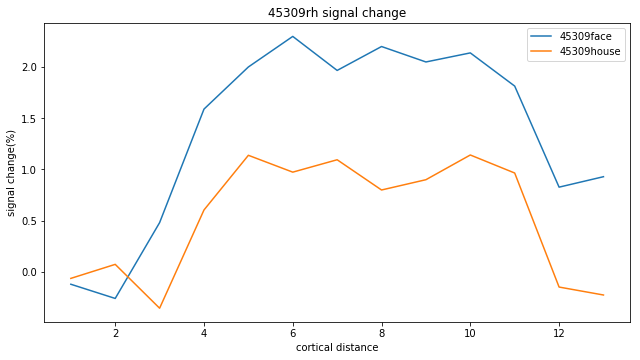

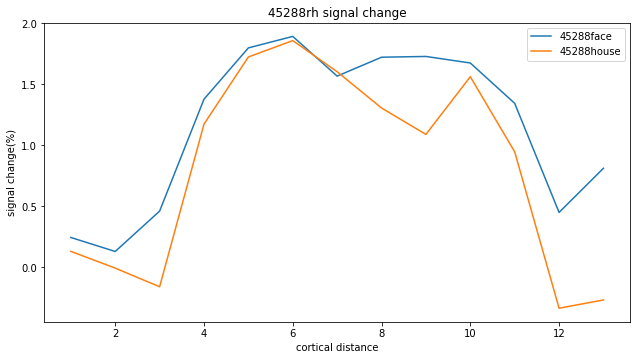

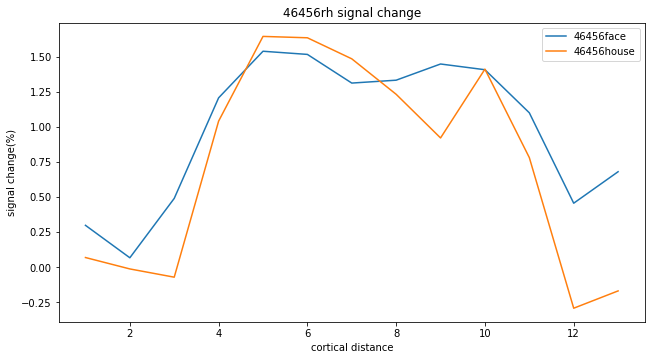

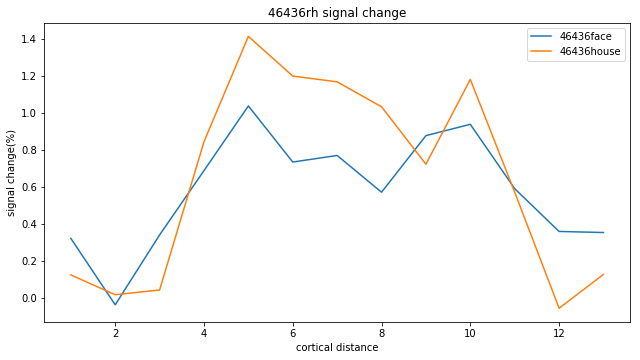

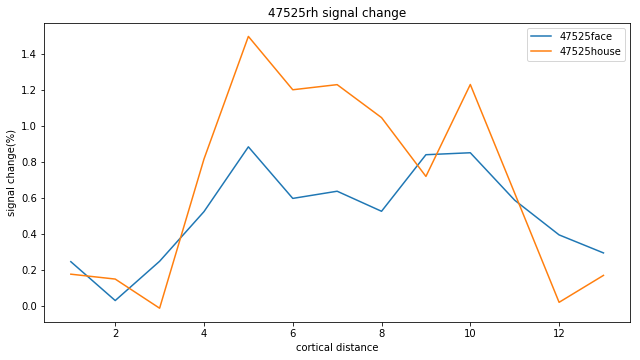

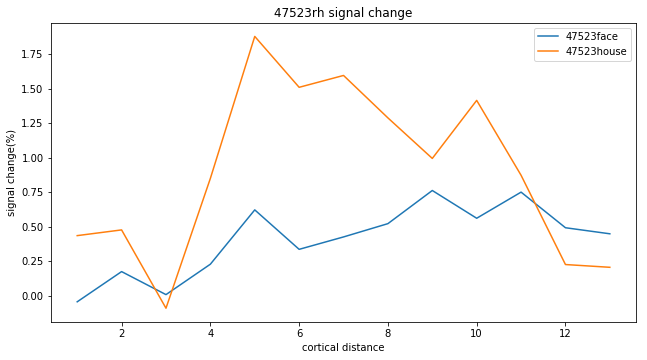

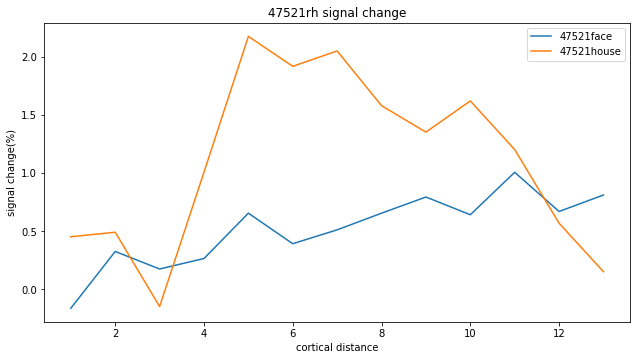

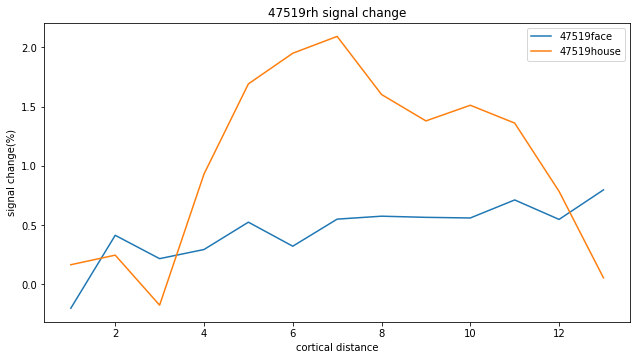

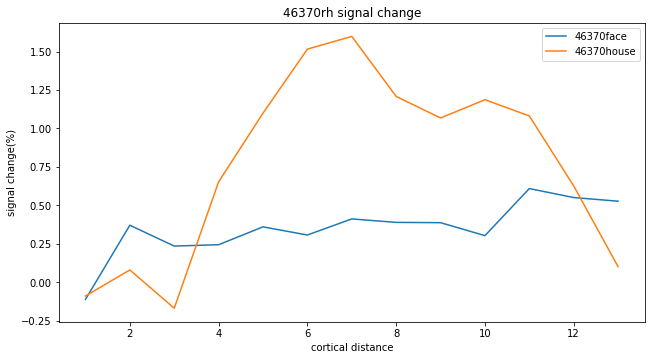

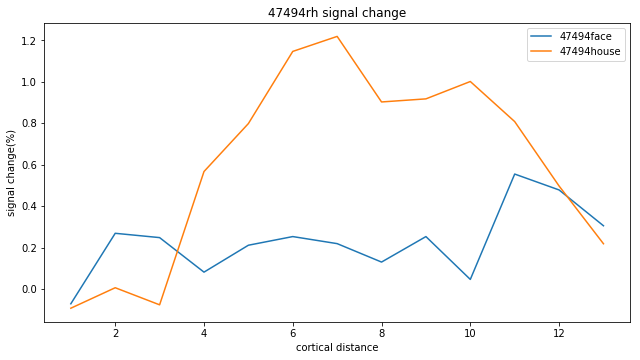

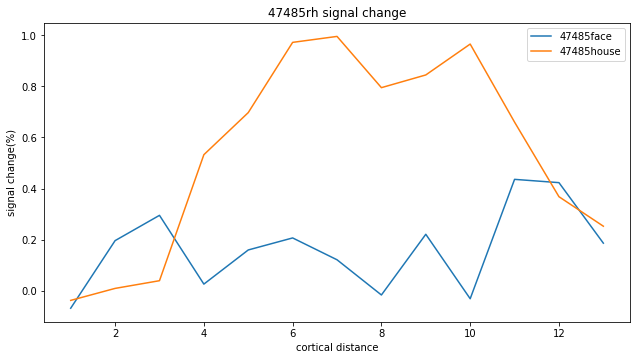

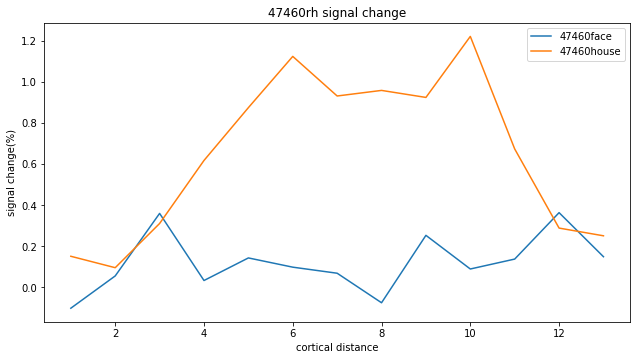

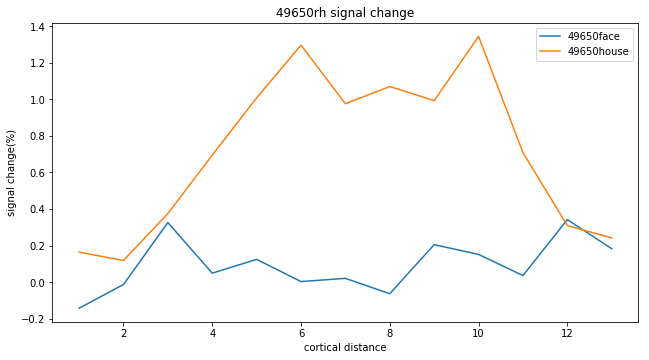

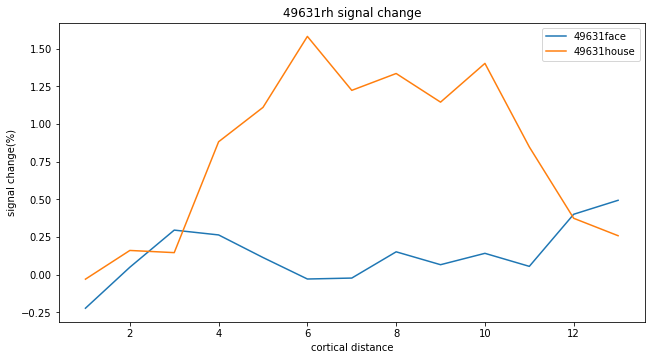

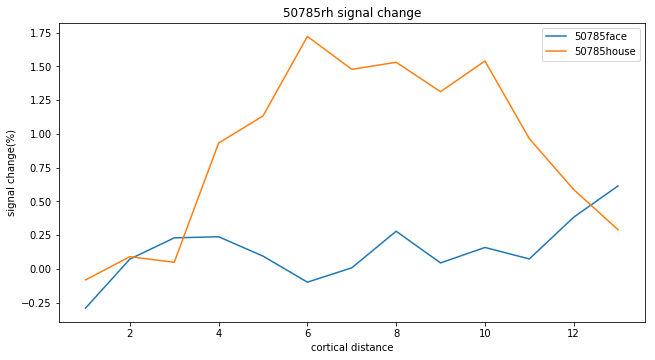

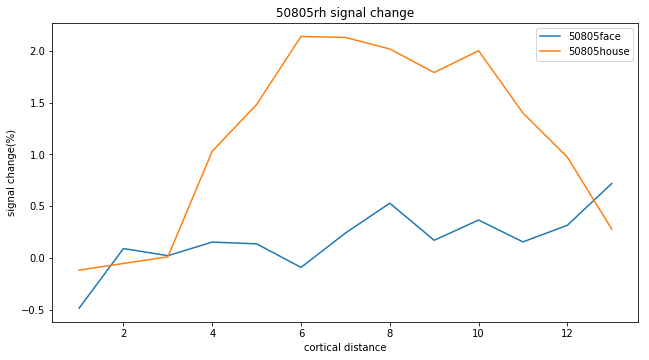

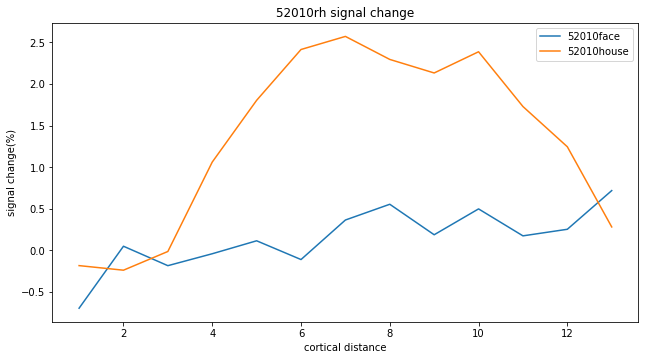

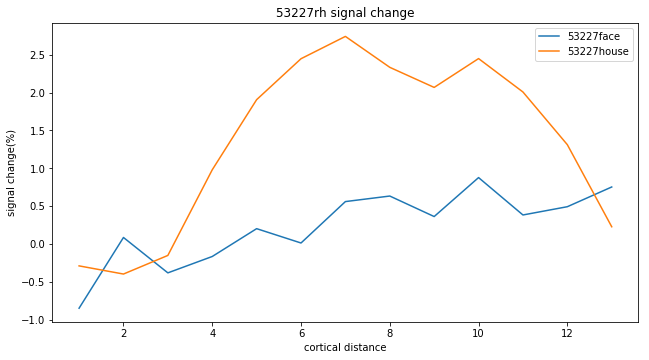

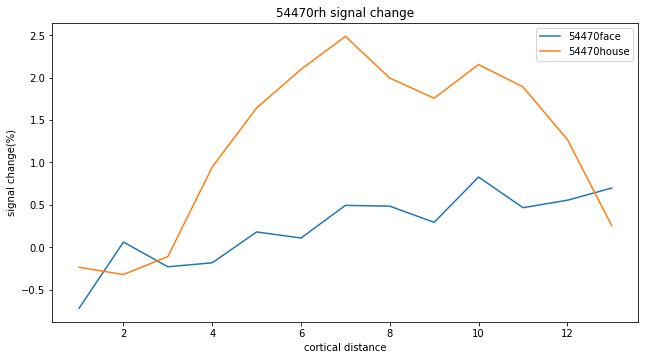

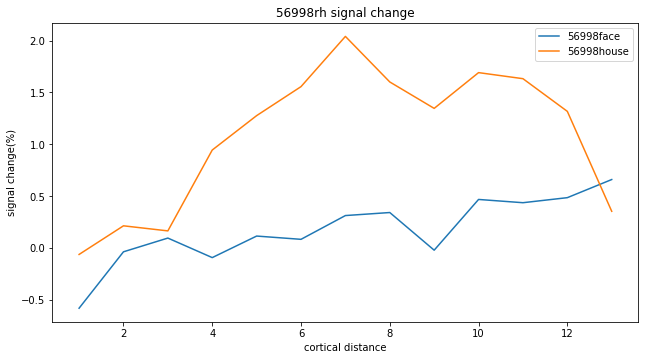

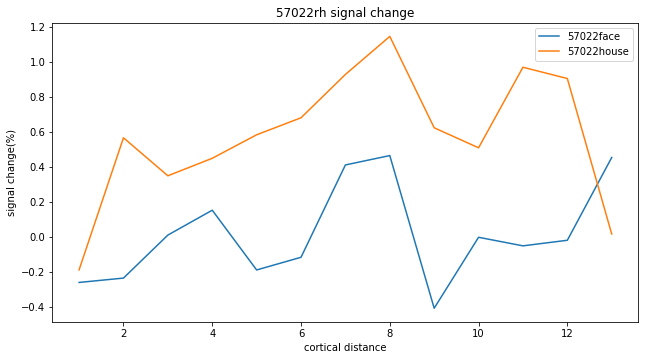

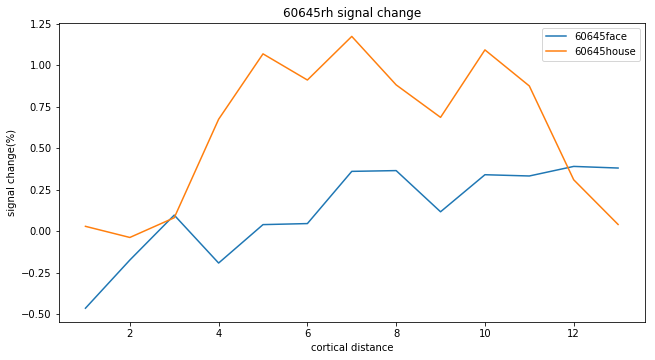

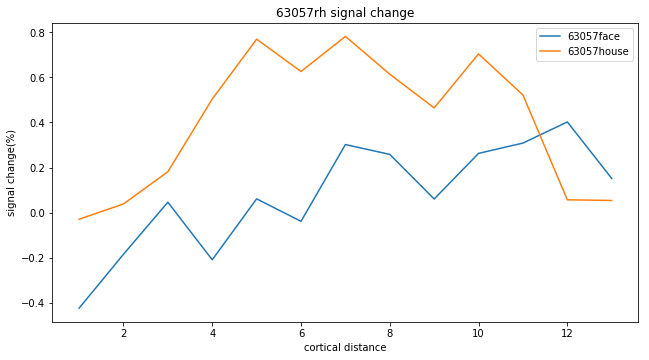

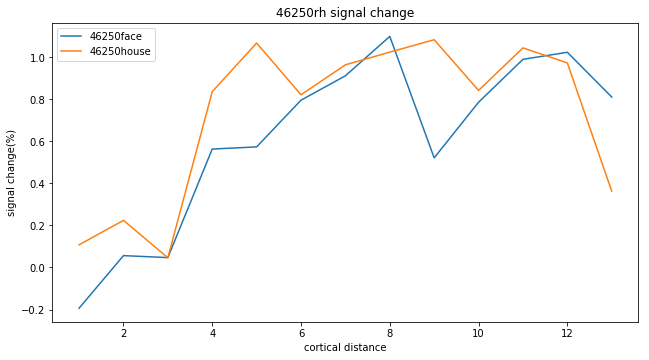

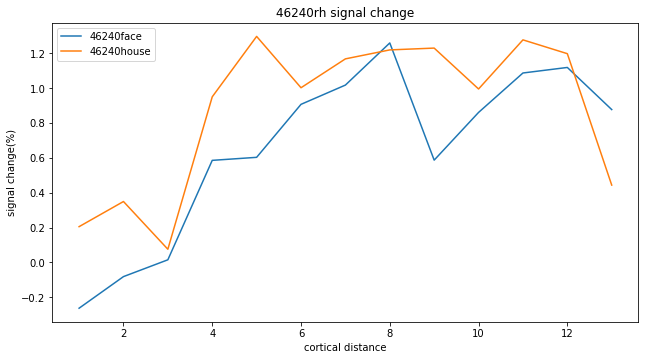

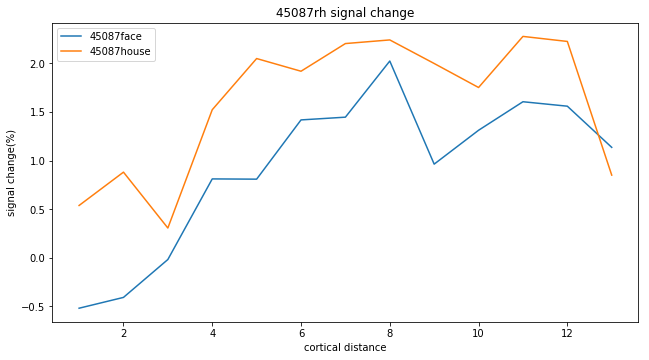

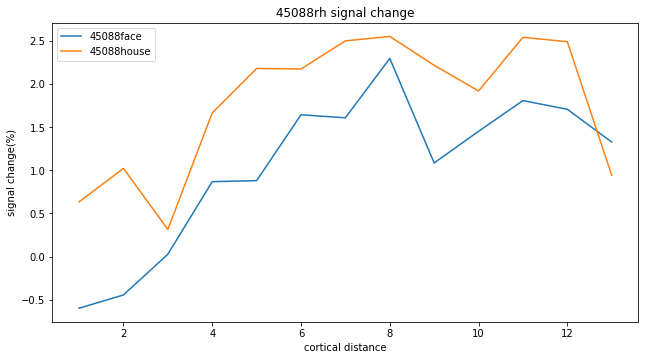

NameError: global name 'allRunPsc' is not defined

In [30]:
#画出percent single change

#数据整理，然后求信号变化比
#画出percent single change
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
#读取所有run的bold信号的大小
#把所有node的值相加，求平均,即求这个roi的平均的时间序列
def getBoldData(boldInfileDir,roiName):
    temp = []
    x =[]
    boldFileName = roiName
    boldFinalDir = os.path.join(boldInfileDir,boldFileName)
    with open(boldFinalDir) as f:
        for line ,i in enumerate(f.readlines()):
            if i[0] != "#":
                temp.append(np.array(map(float,i.split(" ")[1:])))
    aveRoiData = np.zeros((1,len(temp[0])))
    for i in range(0,len(temp)-1):
#         print "temp",temp[i],boldFinalDir         
        temp[i].shape = 1,168
        aveRoiData = aveRoiData+temp[i]
    aveRoiData = aveRoiData/(len(temp)-1)
    aveRoiData = aveRoiData[0]
    return aveRoiData

def listdir(filePath,nodeIndices,hemi):
    path = os.path.join(filePath,nodeIndices)
    num = []
    with open(path) as f:
        for line ,i in enumerate(f.readlines()):
            num.append(int(float(i[3:])))
    return num

def getformat(filePath,hemi):
    #contract labels
    index = []
    for h in range(len(hemi)):
        #get roiName
        nodeIndices = "nodelocations_"+hemi[h]+".1D"
        roiName = listdir(filePath,nodeIndices,hemi[h])
        for i in range(len(roiName)):
            for j in range(1,169):
                index.append((hemi[h],'roi'+str(roiName[i]), str(j)))


    mul_index = pd.MultiIndex.from_tuples(index)
    pop = pd.Series(index=mul_index)
    pop_df = pd.DataFrame({'run1':pop,'run2':pop})
    return pop_df
    
def getArrangedData(filePath,hemi):
    pop_df = getformat(filePath,hemi)
    #extract data and form the final fomat
    for h in range(len(hemi)):
        #get roiName
        nodeIndices = "nodelocations_"+hemi[h]+".1D"
        roiName = listdir(filePath,nodeIndices,hemi[h])
        for i in range(len(roiName)):
            for r in ["1","2"]:
                nodesName = hemi[h] +"_roi"+str(roiName[i])+"run"+r+".Nodesvals.txt"
                pop_df.loc[(hemi[h],"roi"+str(roiName[i])),"run"+str(r)] = getBoldData(filePath,nodesName)
    return pop_df

def getAllPscData(alll_data,hemi,run):
    allPscData = getformat(filePath,hemi)
    #把数据分解，分成 1.lh,rh; 2.rois; 3.run1,run2
    for h in range(len(hemi)):
        nodeIndices = "nodelocations_"+hemi[h]+".1D"
        roiName = listdir(filePath,nodeIndices,hemi[h])
        for i in range(len(roiName)):
            for r in range(1,len(run)+1):
                singleData = alll_data.loc[(hemi[h],"roi"+str(roiName[i])),"run"+str(r)]
#                 print "singleData",alll_data.loc[(hemi[h],"roi"+str(roiName[i])),"run"+str(r)][0:5]
                
                for Scoretype in [0,1]:#把数据分成两份，一份是face的，一份是house的
                    trNumber = 12
                    countBlockNum = 5
                    allPsc = np.zeros([trNumber,1],int)
                    finalPsc = []
                    stimuluName = " "
                    
                    if Scoretype == 0:
                        stimuluName = "face"
                        tem = np.array([16,80,144,208,272])/2 #读取第几个tr的时间点
                    if Scoretype == 1:
                        stimuluName = "house"
                        tem = np.array([48,112,176,240,304])/2
                        
                    for j in tem:
                        baseline = singleData[j-3:j-1]
                        stimuliTime = singleData[j-1:j+trNumber]
                        baseline = np.sum(baseline)/2
                        
                        psc = (stimuliTime - baseline)/baseline*100
                        alll_data.loc[(hemi[h],"roi"+str(roiName[i])),"run"+str(r)][j-1:j+trNumber] = psc
                        
                        allPsc = np.array([float(m+n) for m,n in zip(allPsc,psc)])
                        
                    allPsc = allPsc/countBlockNum
                    finalPsc.append(list(allPsc))
                    finalPsc = np.array(finalPsc)
    return alll_data

def getAllRoiAverageData(pscAllData,hemi,run):
    trNumber = 12
    countBlockNum = 5
    stimuluName = " "
    for h in range(len(hemi)):
        nodeIndices = "nodelocations_"+hemi[h]+".1D"
        roiName = listdir(filePath,nodeIndices,hemi[h])
        
        fig, ax = plt.subplots()
        fig.set_size_inches(10.5, 5.5)
        plt.title(hemi[h]+" signal change")
        plt.xlabel("cortical distance")
        plt.ylabel("signal change(%)")
        
        for Scoretype in [0,1]:#把数据分成两份，一份是face的，一份是house的
            if Scoretype == 0:
                    stimuluName = "face"
                    tem = np.array([16,80,144,208,272])/2 #读取第几个tr的时间点
            if Scoretype == 1:
                stimuluName = "house"
                tem = np.array([48,112,176,240,304])/2
            allRoiMaxPsc = []
            for i in range(len(roiName)):
                allRunRawData = []
                
                for r in range(1,len(run)+1):
                    perRunPsc = np.zeros([trNumber,1],int)
                    singleData = pscAllData.loc[(hemi[h],"roi"+str(roiName[i])),"run"+str(r)]
                    for j in tem:
                        psc = singleData[j-1:j+trNumber]
                        allRunRawData.append(psc)
                        
                allRunRawData = np.mat(allRunRawData).reshape(len(tem)*len(run),trNumber+1) 
                allRoiMaxPsc.append(np.max(np.mean(allRunRawData,axis=0)))
                
            x =list(range(0,len(allRoiMaxPsc),1))
            total_width, n = 0.8, 2
            width = total_width / n
            for i in range(len(x)):
                x[i] = x[i] + width
#             plt.bar(x, allRoiMaxPsc, width=width, label=stimuluName)
#             plt.legend() # 显示图例
    
            x = list(range(1,len(allRoiMaxPsc)+1,1))
            plt.plot(x, allRoiMaxPsc, label="all_roi"+stimuluName)
#                 plt.errorbar(x, allRunPsc, yerr=X_std.T,label=str(roiName[i])+stimuluName)
            plt.legend()
        plt.show()
          
                
def getAllRunPsc(pscAllData,hemi,run):
    trNumber = 12
    countBlockNum = 5
    stimuluName = " "
    
    for h in range(len(hemi)):
        nodeIndices = "nodelocations_"+hemi[h]+".1D"
        roiName = listdir(filePath,nodeIndices,hemi[h])
        for i in range(len(roiName)):
            fig, ax = plt.subplots()
            fig.set_size_inches(10.5, 5.5)
            plt.title(str(roiName[i])+hemi[h]+" signal change")
            plt.xlabel("cortical distance")
            plt.ylabel("signal change(%)")

            for Scoretype in [0,1]:#把数据分成两份，一份是face的，一份是house的
                if Scoretype == 0:
                        stimuluName = "face"
                        tem = np.array([16,80,144,208,272])/2 #读取第几个tr的时间点
                if Scoretype == 1:
                    stimuluName = "house"
                    tem = np.array([48,112,176,240,304])/2
                allRunRawData = []
                for r in range(1,len(run)+1):
                    singleData = pscAllData.loc[(hemi[h],"roi"+str(roiName[i])),"run"+str(r)]
                    for j in tem:
                        psc = singleData[j-1:j+trNumber]
                        allRunRawData.append(psc)
                
                allRunRawData = np.mat(allRunRawData).reshape(countBlockNum*len(run),trNumber+1)
                
                X_mean = np.mean(allRunRawData,axis=0).tolist()[0]
                X_std = np.std(allRunRawData, axis=0).tolist()[0] # axis=0，计算每一列的均值
                x = list(range(1,len(X_mean)+1,1))
                
                plt.plot(x, X_mean, label=str(roiName[i])+stimuluName)
#                 plt.errorbar(x, allRunPsc, yerr=X_std.T,label=str(roiName[i])+stimuluName)
                plt.legend()
        plt.show()
    return allRunPsc            


run = range(1,3)
hemi = ["lh","rh"]
subjname = ["bg_data"]


for s in range(len(subjname)):
    filePath = "/home/hh/study/python/code/ml/nipype_tutorial/bingfreesurfer/"+subjname[s]+"/SUMA"
    alll_data = getArrangedData(filePath,hemi)
    pscAllData = getAllPscData(alll_data,hemi,run)
    getAllRoiAverageData(pscAllData,hemi,run)
    getAllRunPsc(pscAllData,hemi,run)